<a href="https://colab.research.google.com/github/RupeshSharma14/Airbnb-Bookings-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction** 

### <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

### <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

### <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **Installing Dependencies**

In [ ]:
!pip install matplotlib --upgrade     # updating matplotlib as we are using bar_label function which is introduced in recent versions(matplotlib >= 3.4.2) 

In [ ]:
!pip install geopandas

**Note - After installing the dependencies, we will have to restart the runtime.**

# **Data Preparation and Cleaning** 

In [ ]:
# Importing Libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [ ]:
# Configuration for matplotlib graphs

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (13, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid');

In [ ]:
# Mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the csv file into pandas dataframe

path = "/content/drive/MyDrive/Airbnb Bookings Analysis/Airbnb NYC 2019.csv"
airbnb_df = pd.read_csv(path)

In [ ]:
# Displaying the dataframe

airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Checking the size of dataset

airbnb_df.shape

(48895, 16)

**The dataset contains 48895 observations and 16 features.**

In [ ]:
# Checking for duplicate rows in the dataset

airbnb_df.duplicated().sum()

0

In [ ]:
# Checking the basic information of the dataset

airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**The dataset contains a mix of numerical and categorical features.**

**The dataset contain NULL values in "id","name","last_review" and "reviews_per_month" columns.**

In [ ]:
# Counting the number of null values in "name", "host_name", "number_of_reviews" and "last_review" columns

nan_values_cols = ["name", "host_name", "reviews_per_month", "last_review"]
airbnb_df[nan_values_cols].isna().sum()

name                    16
host_name               21
reviews_per_month    10052
last_review          10052
dtype: int64

In [ ]:
# Handling the NULL values in "name", "host_name" and "reviews_per_month" columns

airbnb_df.dropna(subset = ["name", "host_name"], inplace = True)        # Dropping the rows having NULL values in "name", "host_name" column

airbnb_df["reviews_per_month"].fillna(0.0, inplace = True)              # Filling NULL values of "reviews_per_month" with 0.0

In [ ]:
# Converting the data type of "last_review" column to datetime object

airbnb_df["last_review"] = airbnb_df["last_review"].astype("datetime64")

In [ ]:
# Extracting year and month from the "last_review" column

airbnb_df["last_review_month"] = airbnb_df["last_review"].apply(lambda row: row.month)
airbnb_df["last_review_year"] = airbnb_df["last_review"].apply(lambda row: row.year)

In [ ]:
# Dropping "last_review", "reviews_per_month" column

airbnb_df.drop(labels = ["last_review", "reviews_per_month"], axis = 1, inplace = True)        

In [ ]:
# Descriptive summary

col_to_check = ['price',	'minimum_nights','number_of_reviews', 'calculated_host_listings_count','availability_365', 'last_review_month',	'last_review_year']
airbnb_df[col_to_check].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_month,last_review_year
count,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,38821.000000,38821.000000
mean,152.740309,7.012444,23.273098,1.091124,7.148369,112.801425,6.173901,2018.288323
std,240.232386,20.019757,44.549898,1.597270,32.964600,131.610962,2.531374,1.180598
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2011.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,5.000000,2018.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,6.000000,2019.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,7.000000,2019.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,12.000000,2019.000000


**The minimum price of a listing is mentioned 0 here but Airbnb starts the listing price with a minimum of $10.**

**Minimum availability of a listing is 0 it may be due to following possibilities:**

> **1. May be the listing is booked for a year by the guest.**

> **2. There might be a chance of bad entry.**

**Although AIRBNB was founded in 2008 but our dataset contains data from 2011 to 2019.**

**The descriptive summary also tells us outliers are present in many columns of the data.**

In [ ]:
# Changing the minimum price to $10

airbnb_df["price"] = np.where(airbnb_df["price"] < 10, 10, airbnb_df["price"])

In [ ]:
# Creating a new column "price_category"

airbnb_df["price_category"] = pd.cut(airbnb_df["price"], bins = [10, 100, 200, 10000], include_lowest = True, labels = ["low", "mid", "high"])

In [ ]:
# Displaying the final dataframe after data preparation

airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_month,last_review_year,price_category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,10.0,2018.0,mid
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,5.0,2019.0,high
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,NaN,NaN,mid
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,7.0,2019.0,low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,11.0,2018.0,low


# <b>Data Exploration and Visualization</b>

**Let's start our data exploration journey by counting the number of listings present in our dataset.**

In [ ]:
# Number of listings present in the dataset

num_listings = airbnb_df["id"].count()
num_listings

48858

> **There are 48,858 listings present in the dataset.**



**Let's try to visualize these listings in New York City map and draw some insights from it.**

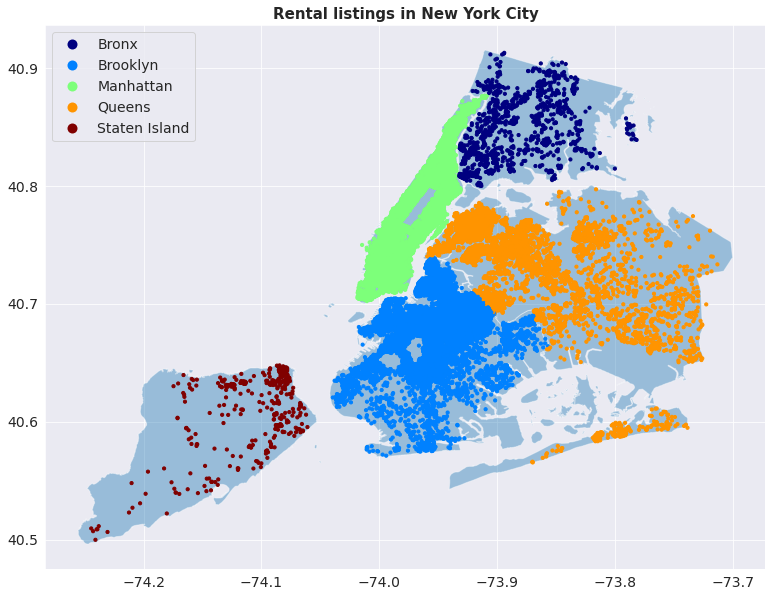

In [ ]:
gdp_path ="/content/drive/MyDrive/Airbnb Bookings Analysis/Borough Boundaries/geo_export_0c550535-4d21-4555-aa94-73550209bb00.shp"

# loading the New York city map
street_map = gpd.read_file(gdp_path)

# Zip x and y coordinates
geometry = [Point(xy) for xy in zip(airbnb_df["longitude"], airbnb_df["latitude"])]

# Creating Geopandas dataframe
geo_df = gpd.GeoDataFrame(airbnb_df, geometry = geometry)

# Creating figure and axes, assign to subplot
fig, ax = plt.subplots(figsize = (15, 10))

# Add .shp mapfile to axes
street_map.plot(ax = ax, alpha = 0.4)
geo_df.plot(column = "neighbourhood_group", ax = ax, legend = True, markersize = 10, cmap = "jet")

# Adding title to graph
plt.title("Rental listings in New York City", fontsize = 15, fontweight = "bold")

plt.show()



> **From the map, we can see that there are listings from most parts of Manhattan followed by Brooklyn.**


> **Staten Island has the least number of listings.**




**Now let's try to find the exact count of listings present in each neighbourhood group.**

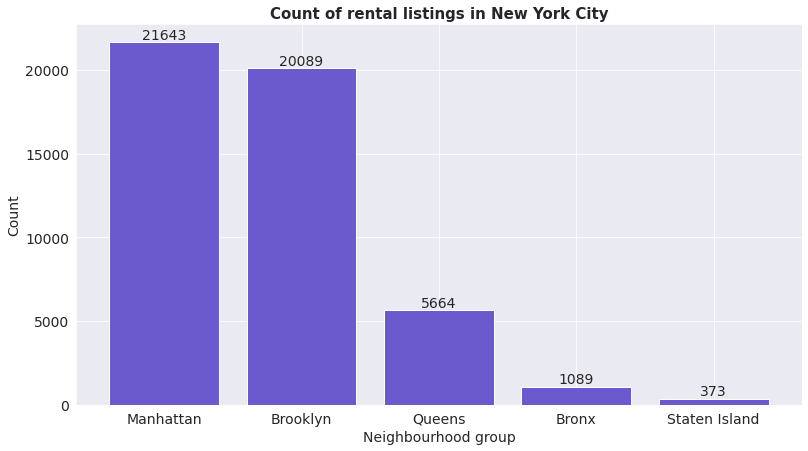

In [ ]:
# Number of listings present in each neighbourhood_group

nbhd_grp_count = airbnb_df["neighbourhood_group"].value_counts()
nbhd_grp_count_plot = plt.bar(x = nbhd_grp_count.index, height = nbhd_grp_count.values, color = "slateblue")
plt.bar_label(nbhd_grp_count_plot)

plt.xlabel("Neighbourhood group")
plt.ylabel("Count")
plt.title("Count of rental listings in New York City", fontsize = 15, fontweight = "bold")

plt.show()



---



> **Now it's quite clear AIRBNB has a widespread business across Manhattan and Brooklyn as the most number of listings in the New York City area from here.**



**Most listings are from Manhattan followed by Brooklyn but what about the prices of these listings? Are these listings prices cheap or costlier as compared to other locations? Let's dig it out.**

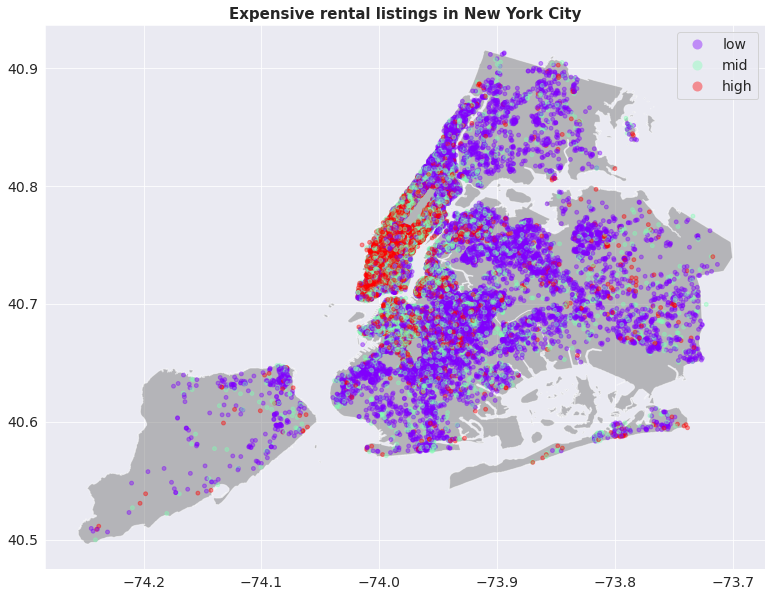

In [ ]:
# Expensive rental listings in New York City map

fig, ax = plt.subplots(figsize = (15, 10))
street_map.plot(ax = ax, alpha = 0.5, color = "grey")
geo_df.plot(column = "price_category", alpha = 0.4, ax = ax, legend = True, markersize = 15, cmap = "rainbow")

plt.title("Expensive rental listings in New York City", fontsize = 15, fontweight = "bold")

plt.show()

> **Its clearly visible, Manhattan has the expensive listings. It means that Manhattan is the most profitable location both for the AIRBNB and its hosts.**



**But what makes Manhattan such an expensive location of New York City? The answer lies in the fact that Manhattan is the cultural, administrative, financial center of New York City and is headquarter of major MNCs and important universities. It's also the home to the world's two largest stock exchanges by total market capitalization: the New York Stock Exchange and NASDAQ which raises the bar of cost of living in Manhattan.**

**Before moving forward Let's check out the median price of listings in each neighbourhood group.**

In [ ]:
# Median price of listing in each neighbourhood_group

airbnb_df.groupby("neighbourhood_group")["price"].median().to_frame()

,price
neighbourhood_group,
Bronx,65
Brooklyn,90
Manhattan,150
Queens,75
Staten Island,75




> **The median price of a listing in Manhattan is $150 and there is a huge gap in the median price of Manhattan as compared to other neighbourhood groups.**



**Before going forward let's find out minimum night stay in each Neighbourhood group**

In [ ]:
# Minimum nights stay for each neighbourhood_group

airbnb_df.groupby('neighbourhood_group')['minimum_nights'].median().to_frame()

,minimum_nights
neighbourhood_group,
Bronx,2
Brooklyn,3
Manhattan,3
Queens,2
Staten Island,2


> **Three nights minimum stay is required for Manhattan and Brooklyn while the rest of the neighbourhood group have two nights of minimum stay.**



**Let move forward and gain insights from other feature variables. Lets talk about the types of rooms provided by AIRBNB hosts in New York City.**

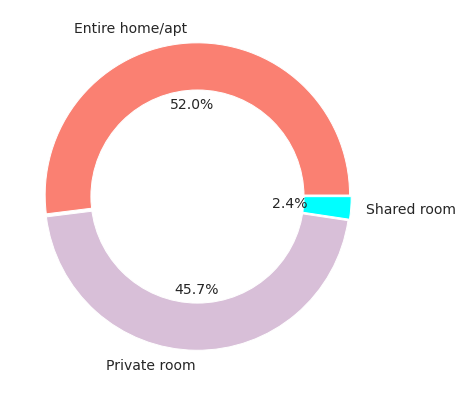

In [ ]:
# Type of room space airbnb host provides
 
plt.pie(airbnb_df['room_type'].value_counts(), labels = ['Entire home/apt', 'Private room', 'Shared room'], autopct='%1.1f%%',
        explode = [0.01, 0.01, 0.01], colors = ["salmon", "thistle", "aqua"])

# Adding a circle at the center to transform it in a donut chart
circle = plt.Circle( (0,0), 0.7, color='white')
ax = plt.gcf()
ax.gca().add_artist(circle)

plt.show()

> **Most of the AIRBNB hosts present in New York City rents there Entire home/apartment and Private room.**

> **Shared rooms are rarely rented by hosts.**







**Now let's try to visualize with the help of a bar plot which type of room is mostly listed in each neighbourhood group.**

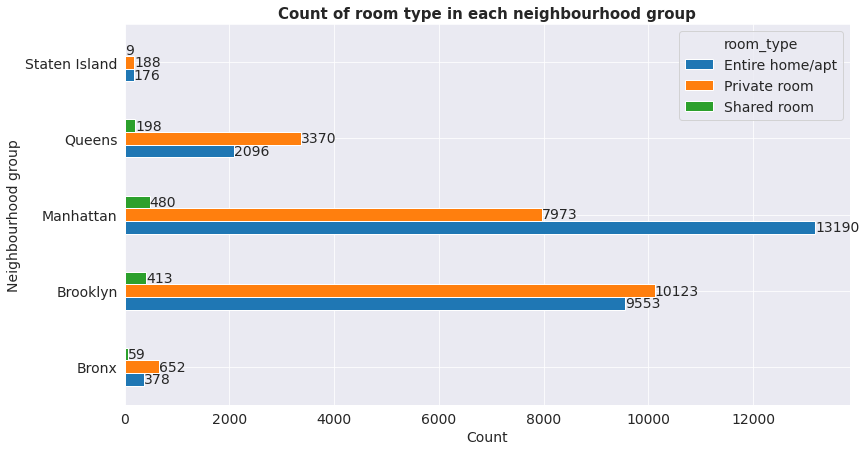

In [ ]:
# Type of room space airbnb host provides in each borough

nhbd_grp_rm =  pd.crosstab(index = airbnb_df["neighbourhood_group"], columns = airbnb_df["room_type"])
nhbd_grp_rm_plot = nhbd_grp_room.plot(kind = "barh")

for container in nhbd_grp_rm_plot.containers:
  nhbd__grp_rm_plot.bar_label(container)

plt.xlabel("Count")
plt.ylabel("Neighbourhood group")
plt.title("Count of room type in each neighbourhood group", fontsize = 15, fontweight = "bold")

plt.show()

> **It seems like half the listings renting out Entire houses and apartments are from Manhattan only.**


> **Private rooms are mostly rented out in all neighbourhood group except in Manhattan.**

**Now the question arises what is the price of different room types in different neighbourhood group? Let's find it out by calculating the median price for every room type in a different neighbourhood group.**

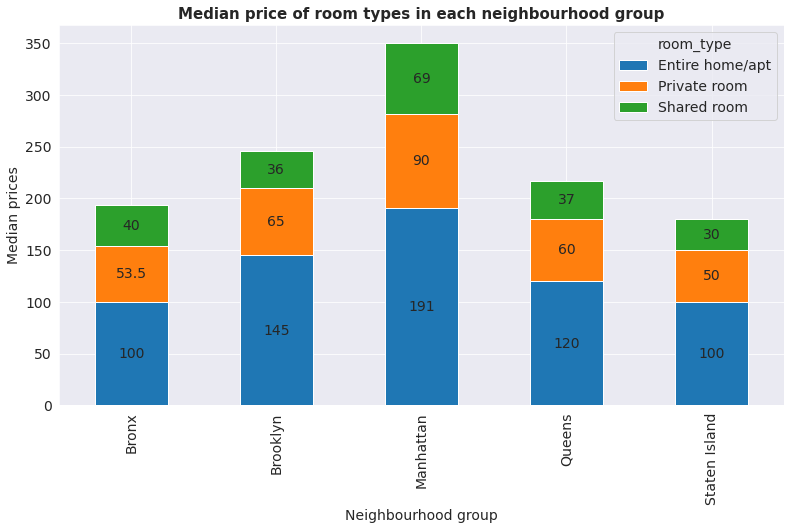

In [ ]:
# Median price of room in every borough for each room type

nhbd_grp_rm_price = pd.pivot_table(data = airbnb_df, values = "price",index = "neighbourhood_group", columns = "room_type", aggfunc = np.median)
nhbd_grp_rm_plot = nhbd_rm_price.plot(kind = "bar", stacked = True)

for container in nhbd_grp_rm_plot.containers:
  nhbd_grp_rm_plot.bar_label(container, label_type = "center")

plt.xlabel("Neighbourhood group")
plt.ylabel("Median prices")
plt.title("Median price of room types in each neighbourhood group", fontsize = 15, fontweight = "bold")

plt.show()

> **Entire houses and apartments are expensive in every neighbourhood group.**

> **Brooklyn and Queens have similar price ranges for Private and Shared rooms**

> **The Bronx and Staten Island have a similar type of price range for each room type.**





**Next question we can ask from the data is what is the minimum night stay for a guest for each room type. Let's try to get an answer.**

In [ ]:
# Minimum night stay for each room type

airbnb_df.groupby('room_type')['minimum_nights'].median().reset_index()

,room_type,minimum_nights
0,Entire home/apt,3
1,Private room,2
2,Shared room,1




> **Minimum three nights of stay is required for Entire house, two nights of stay for Private rooms and one night of stay for Shared room.**



**Let's create a visualization to visualize the growth in popularity AIRBNB has gained in the past few years. Our visualization will be based on the assumption that more the number of reviews in the past years, more is the popularity it gains.**

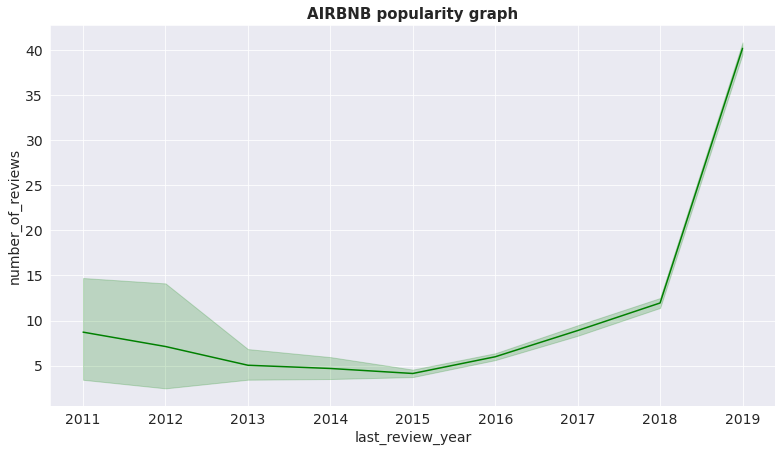

In [ ]:
# AIRBNB popularity graph

year_df = airbnb_df[~airbnb_df["last_review_year"].isna()]

sns.lineplot(x = "last_review_year", y = "number_of_reviews",   data = year_df, color = "green")
plt.title("AIRBNB popularity graph", fontsize = 15, fontweight = "bold")

plt.show()

> **It seems that from 2011 there was a decline in the popularity of AIRBNB till 2015.**

> **From 2015 there is a sudden rise in the popularity of AIRBNB in New York City. The rise may be due to new schemes introduced and change in marketing strategy.**



**Now we will try to find out in which month AIRBNB has most bookings. For this scenario our assumption is that guests gives reviews while enjoying the stay or after leaving the place.**

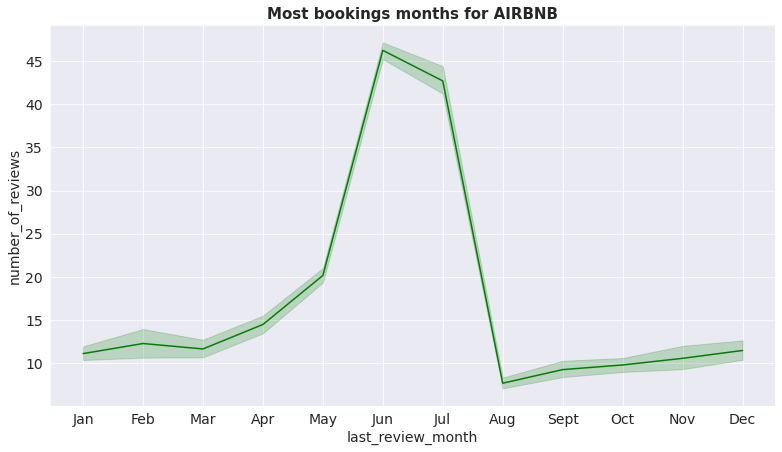

In [ ]:
# Most bookings months for AIRBNB

month_labels = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
                9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

month_df = airbnb_df[~airbnb_df["last_review_month"].isna()].sort_values(by = "last_review_month", ascending = True)
month_df['last_review_month'] = month_df['last_review_month'].apply(lambda x: month_labels[x])

sns.lineplot(x = "last_review_month", y = "number_of_reviews",  data = month_df, color = "green")
plt.title("Most bookings months for AIRBNB", fontsize = 15, fontweight = "bold")

plt.show()

> **In New York City, AIRBNB has its most bookings for the month of June.**


> **The peak business months for AIRBNB are May, June and July.**





**Now let's move forward and extract information about most reviewed hosts.**

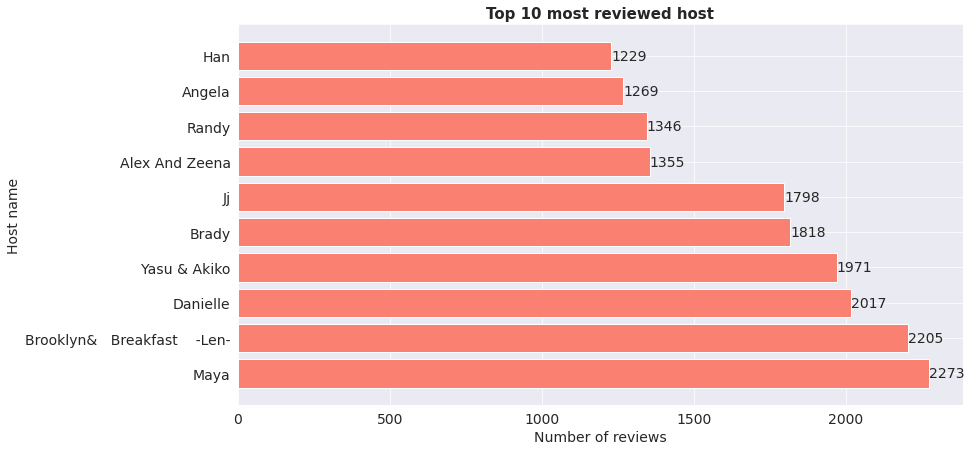

In [ ]:
# Top 10 most reviewed host

reviewed_host = airbnb_df.groupby(['host_id', "host_name", "neighbourhood"])['number_of_reviews'].sum().sort_values(ascending=False).reset_index().head(10)
reviewed_host_plot = plt.barh(width = "number_of_reviews", y = "host_name", data = most_reviewed_host, color = "salmon")
plt.bar_label(reviewed_host_plot)

plt.xlabel("Number of reviews")
plt.ylabel("Host name")
plt.title("Top 10 most reviewed host", fontsize = 15, fontweight = "bold")

plt.show()



> **Maya is the most reviewed host with 2273 reviews.**



**Now we will calculate the median price at which these popular host rent their properties to their guests.**

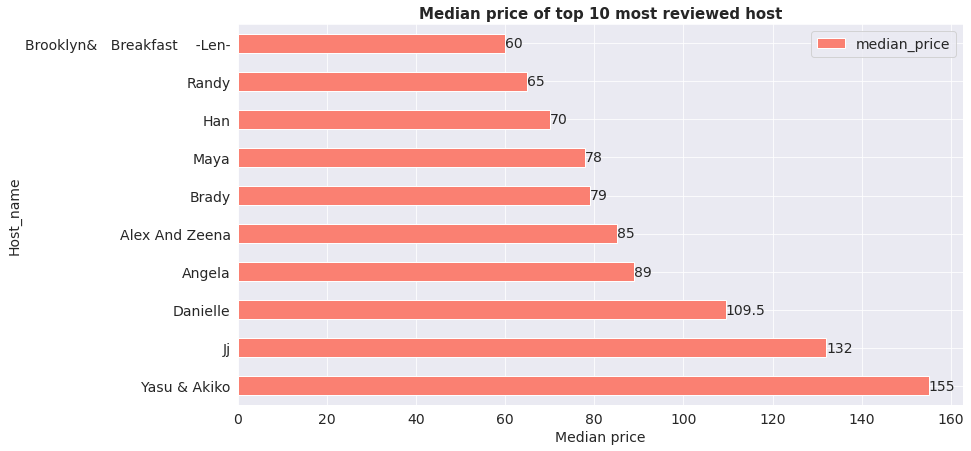

In [ ]:
# Average price of listings of most popular host

reviewed_host_list = reviewed_host["host_name"].to_list() 
top_host_dict = {}
for elem in  reviewed_host_list:
  avg_price = airbnb_df[airbnb_df['host_name'] == elem]["price"].median()
  top_host_dict[elem] = avg_price

avg_price_df = pd.DataFrame(top_host_dict.items(), columns=['Host_name', 'median_price'])
avg_price_df.set_index('Host_name', inplace=True)
avg_price_plot = avg_price_df.sort_values(by = "median_price",ascending=False).reset_index().plot(x = "Host_name",y = "median_price",kind = "barh", color = "salmon")

for container in avg_price_plot.containers:
  avg_price_plot.bar_label(container)

plt.xlabel("Median price")
plt.ylabel("Host_name")
plt.title("Median price of top 10 most reviewed host", fontsize = 15, fontweight = "bold")

plt.show()

> **Among the most reviewed host, Yasu & Akiko has the most expensive listings.**



**We can also calculate the most reviewed neighbourhood of New York City.**



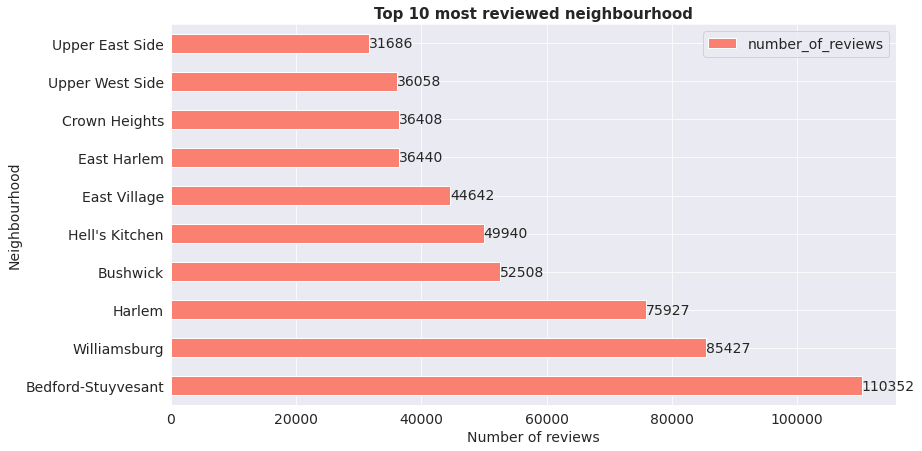

In [ ]:
# Most reviewed neighbourhood

reviewed_nbhd = airbnb_df.groupby(["neighbourhood"])['number_of_reviews'].sum().sort_values(ascending = False).reset_index().head(10)
reviewed_nbhd_plot = reviewed_nbhd.plot(x = "neighbourhood",y = "number_of_reviews",kind = "barh", color = "salmon")

for container in reviewed_nbhd_plot.containers:
  reviewed_nbhd_plot.bar_label(container)

plt.xlabel("Number of reviews")
plt.ylabel("Neighbourhood")
plt.title("Top 10 most reviewed neighbourhood", fontsize = 15, fontweight = "bold")

plt.show()



> **Bedford-Stuyvesant is the most popular neighbouhood. It is due to the fact that Bedford–Stuyvesant has the largest collection of intact and largely untouched Victorian architecture in the United States, with roughly 8,800 buildings built before 1900. I has been a major cultural center for Brooklyn's African American population.**



**We will also calculate the most expensive neighbourhood of New York City.**

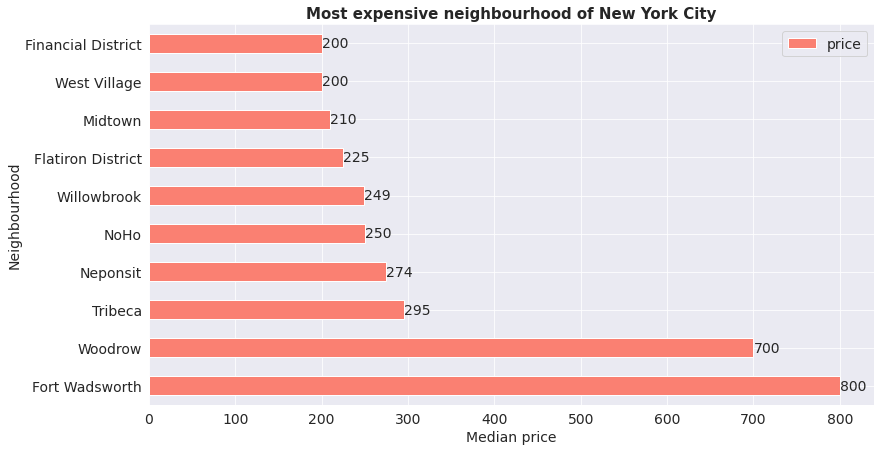

In [ ]:
# Most expensive neighbourhood

costly_nbhd = airbnb_df.groupby(["neighbourhood"])['price'].median().sort_values(ascending = False).reset_index().head(10)
costly_nbhd_plot = costly_nbhd.plot(x = "neighbourhood",y = "price",kind = "barh", color = "salmon")

for container in costly_nbhd_plot.containers:
  costly_nbhd_plot.bar_label(container)

plt.xlabel("Median price")
plt.ylabel("Neighbourhood")
plt.title("Most expensive neighbourhood of New York City", fontsize = 15, fontweight = "bold")

plt.show()



> **Fort Wadsworth is most expensive neighbourhood in the New York City.**



**Now we will be moving to the availability of the listings. We will now visualize the availability of listings in different neighbourhood groups.**

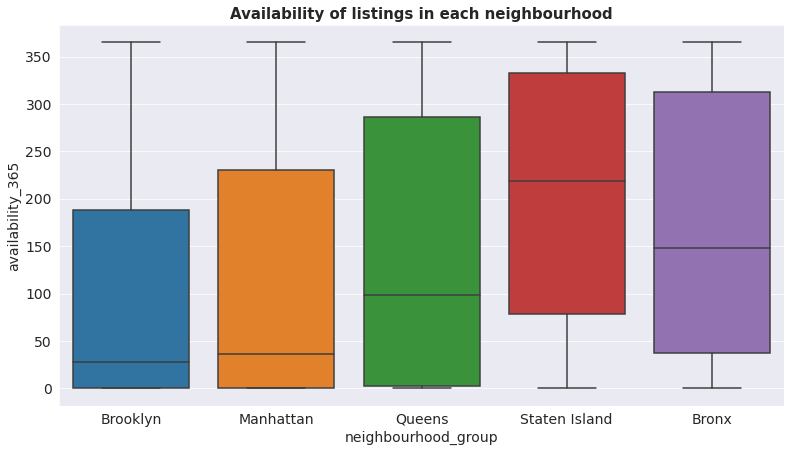

In [ ]:
# Availability of listings in different neighbourhood groups

sns.boxplot(x = "neighbourhood_group", y = "availability_365", data = airbnb_df)
plt.title("Availability of listings in each neighbourhood", fontsize = 15, fontweight = "bold")

plt.show()



> **Most bookings are opened in Staten Island followed by the Bronx.**


> **Only a few bookings are opened in Brooklyn and Manhattan.**





**Let's dive deeper and look for availability of listings for each room type in every neighbourhood group.**

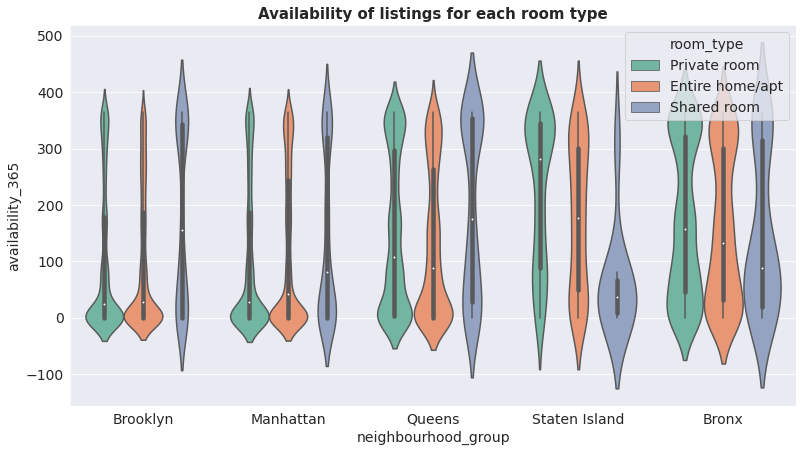

In [ ]:
# Availability of listings for each room type in every neighbourhood group

sns.violinplot(x = "neighbourhood_group", y = "availability_365", data = airbnb_df, hue = "room_type", palette="Set2")
plt.title("Availability of listings for each room type", fontsize = 15, fontweight = "bold")

plt.show()



> **Except Staten Island and Bronx, in all other neighbourhood group mostly shared rooms are available.**


> **In Staten Island and Bronx mostly entire house and private rooms are available.**

**Let's create a correlation matrix to check whether there is any correlation between variables**

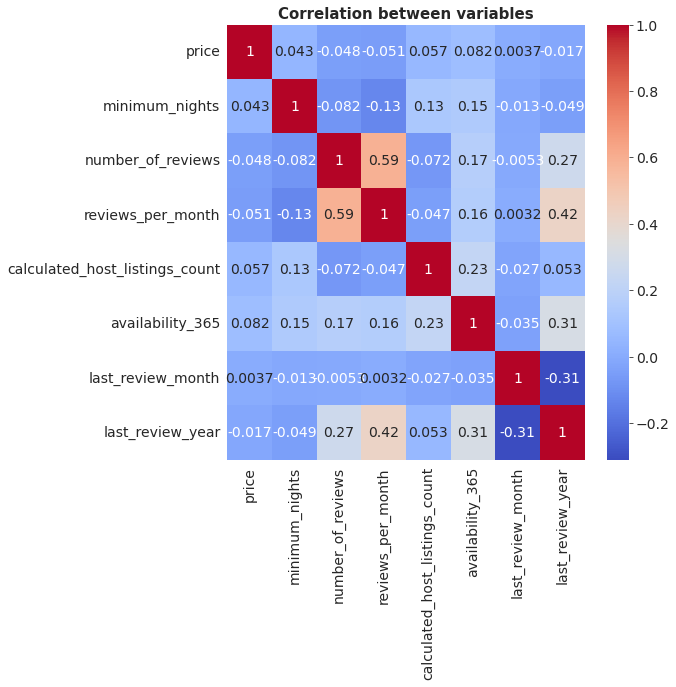

In [ ]:
# Correlation matrix

corr = airbnb_df[col_to_check].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation between variables",  fontsize = 15, fontweight = "bold")

plt.show()

> **No columns are highly correlated.**



# **Inferences and Conclusions**

**We have drawn many interesting inferences from the dataset, here's a summary 
of few of them:**


> ****


